In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
data['Sleep Disorder'] = data['Sleep Disorder'].map({'Sleep Apnea': 1, 'Insomnia': 2})
data['Sleep Disorder'] = data['Sleep Disorder'].fillna(0)
print(data['Sleep Disorder'].head())

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Sleep Disorder, dtype: float64


In [4]:
le = LabelEncoder()
data['Occupation'] = le.fit_transform(data['Occupation'])
print(data['Occupation'].head())

0    9
1    1
2    1
3    6
4    6
Name: Occupation, dtype: int64


In [5]:
le = LabelEncoder()
data['BMI Category']=le.fit_transform(data['BMI Category'])
print(data['BMI Category'])
data['Gender']=le.fit_transform(data['Gender'])
print(data['Gender'])

0      3
1      0
2      0
3      2
4      2
      ..
369    3
370    3
371    3
372    3
373    3
Name: BMI Category, Length: 374, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
369    0
370    0
371    0
372    0
373    0
Name: Gender, Length: 374, dtype: int64


In [6]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)
data['Systolic'] = pd.to_numeric(data['Systolic'])
data['Diastolic'] = pd.to_numeric(data['Diastolic'])
data = data.drop('Blood Pressure', axis=1)
print(data[['Systolic', 'Diastolic']].head())

   Systolic  Diastolic
0       126         83
1       125         80
2       125         80
3       140         90
4       140         90


In [7]:
features = data.columns.tolist()
features=data.drop('Sleep Disorder',axis=1)
X = features
y = data['Sleep Disorder']

In [8]:
print(X)

     Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0            1       1   27           9             6.1                 6   
1            2       1   28           1             6.2                 6   
2            3       1   28           1             6.2                 6   
3            4       1   28           6             5.9                 4   
4            5       1   28           6             5.9                 4   
..         ...     ...  ...         ...             ...               ...   
369        370       0   59           5             8.1                 9   
370        371       0   59           5             8.0                 9   
371        372       0   59           5             8.1                 9   
372        373       0   59           5             8.1                 9   
373        374       0   59           5             8.1                 9   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0  

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
knn = KNC()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
confusionmatrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("confusion matrix:\n",confusionmatrix)
print("Classification Report:\n",class_report)

Accuracy: 0.8761
confusion matrix:
 [[60  4  2]
 [ 2 21  1]
 [ 4  1 18]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        66
         1.0       0.81      0.88      0.84        24
         2.0       0.86      0.78      0.82        23

    accuracy                           0.88       113
   macro avg       0.86      0.86      0.86       113
weighted avg       0.88      0.88      0.88       113



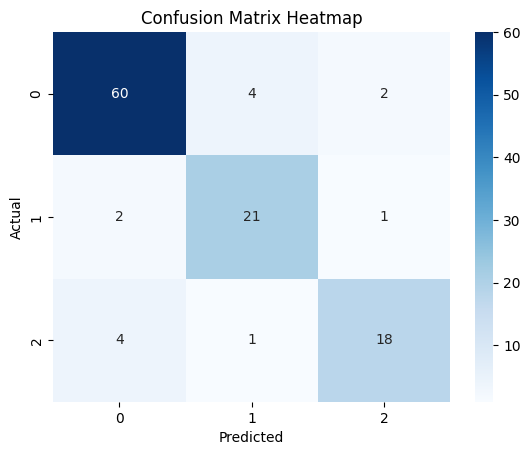

In [14]:
sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1','2'], yticklabels=['0','1','2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()